# Assignment 2

## Exercise 1 (100%)

請利用`atayal.csv`中的賽考利克泰雅語語料，建立一組fasttext word embeddings，並使用K-means cluster analysis進行詞彙分類及畫圖。

- 泰雅語中的`'`指的是glottal stop，有無glottal stop**會造成語意的差別** (e.g. kya' vs. kya)，因此在做前處理時請特別注意。
- K-means clustering的結果請以scatter plot呈現，每個cluster以不同顏色標記，每一點旁邊標上對應的詞彙。
- 你可以任意調整cluster的數量及降維的方式，最後你需要簡單描述你在你的詞彙cluster plot中觀察到的一些現象。

你的output至少需要包含：
1. 你的Fasttext word embedding matrix (45%)
2. K-means cluster plot (45%)
3. 描述你在自己的圖中觀察到每個cluster包含哪些詞彙，有沒有一些語意關聯...（請利用線上辭典）(10%)

泰雅語相關資源：1. [原住民族語言線上辭典](https://e-dictionary.ilrdf.org.tw/tay/search.htm)
2.[族語e樂園](https://web.klokah.tw/multiSearch/)



# FastText Word Embedding Matrix

In [84]:
import re
import pandas as pd
!pip install --upgrade gensim
from gensim.models import FastText
from sklearn.decomposition import PCA
from sklearn import datasets
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import matplotlib.font_manager as fm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

!wget -P /content/drive/MyDrive/NTU_Studies/2021_Fall

Mounted at /content/drive
wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [3]:
## read data
data_loc = '/content/drive/MyDrive/NTU_Studies/2021_Fall/assignment-2-tanlianhui/atayal.csv'
data = pd.read_csv(data_loc).dropna()
data

,text
0,Musa’ su ínu
1,Lokah su ga
2,Maniq la saku la
3,Musa ku qumah
4,Ima' lalú su ?
...,...
106,Wal bziran ni yaba' ku rhzyal qani
107,Nanu pcywagun su ?
108,Nanu cyux su pcywagun ?
109,Wal sgaliq lukus yaba' la


In [86]:
## train model
model = FastText(vector_size = 6, min_count = 1)  # instantiate
model.build_vocab(data)
model.train(data, total_examples = len(data), epochs = 100)  # train

(20, 400)

In [87]:
wv = model.wv

print(wv)

print(wv["musa"])
print('musa' in wv.key_to_index)

[-0.04037743  0.01339926 -0.05003374 -0.01742908  0.01669326  0.01791755]
False


In [88]:
## list words
doc = data[['text']].to_string(header = False)
doc = re.sub("[0-9]+ +", "", doc)
doc = doc.split("\n")
# print(doc)

word_list = []
for i in doc:
  ls = i.split(" ")
  # print(ls)
  for j in ls:
    word = j.split(" ")
    if (word not in word_list) & (word != ""):
      word_list.append(word)
# print(word_list)

flat = []
for i in word_list:
  for word in i:
    word = word.lower()
    word = re.sub("[?!]", "", word)
    if (word not in word_list) & (word != ""):
      flat.append(word)
print(len(flat), flat)

my_list = list(set(flat))
print(len(my_list), my_list)

set(flat).difference(set(my_list))

224 ['musa’', 'su', 'ínu', 'lokah', 'ga', 'maniq', 'la', 'saku', 'musa', 'ku', 'qumah', "ima'", 'lalú', 'ta', 'kin', 'zíboq', 'sgaya', 'ta’', 'pkita', 'ta', 'tai', 'spayat', 'ryax', 'sa', 'rehay', 'enial', 'lozi', 'ki', 'cyux', 'maki', 'ngasal', 'mu', 'cisal', 'cikay', 'lao', 'mincisal', 'sraral', 'wa', 'pucing', 'seqani', 'ke', 'maku', 'mhway', 'balay', 'si', 'ngyaw', 'nalu', 'wahán', 'uzyay', 'ktul', 'm’uzyay', 'qu', 'tmutu', 'ruma', 'i', "yaba'", 'maku.', '‘ngraowi', 'ki', 'pyaray', 'misu', 'laki', 'ha', 'lai', 'salu’', 'roziq', 'ka', 'cyux', '‘pxan', 'btunu', 'qba’', 'nya', 'yugaw', 'lukusumu', 'abi’', 'pqutay', 'nyux', 'm’unu', 'musa’', 'mzyup', 'qsya’', 'bhyun', '‘laqi', 'qani', 'kya', 'pila', 'k’ya', 'kya', 'bila', 'inu', 'qbubu', 'salu', 's’alu’', 'minqutux', 'kmal', 'bhut', 'baq', 'lmpuw', 'nyux', 'skayal', 'kmayal', 'mqeru’', 'yaya', 'meqeru', 'ngli', 'mbitu', 'yobun', 'bitu', 'guru', 'ngau', 'ngta', 'qasa', 'hibux', 'tzyu', 'abaw', 'hongu’', 'utux', 'aras', 'sbin', 'wal', 'm

set()

In [89]:
matrix = []
matrix_row_name = []
for i in my_list:
  matrix_row = []
  # print(i)
  matrix_row_name.append(i)
  vec = wv[i]
  for j in vec:
    matrix_row.append(j)
  matrix.append(matrix_row)

In [90]:
print(matrix)

[[0.010982132, -0.0032485402, -0.038358234, -0.017175004, -0.019668939, -0.028520131], [0.019850764, -0.041123427, 0.0059670336, -0.0019248084, -0.0052769086, -1.4525652e-05], [-0.0139115285, -0.0048579397, 0.00015144583, -0.024674138, -0.0028561514, 0.042332966], [0.008226375, 0.010191207, -0.023106374, 0.007889742, 0.023468249, -0.0010887732], [-0.040377434, 0.013399256, -0.05003374, -0.01742908, 0.016693264, 0.017917546], [0.005910767, 0.014273351, 0.001648132, 0.023769174, 0.0033945404, 0.041421693], [-0.03069846, 0.03263139, 0.07659134, 0.002718024, 0.004258915, 0.04848843], [0.073707566, -0.022688314, -0.015972968, 0.03882073, -0.03364798, -0.020602902], [-0.028154036, -0.008453413, 0.04323504, 0.01203784, 0.034893278, -0.015371926], [0.011517538, 0.02745212, -0.032000657, 0.007376879, -0.02687912, -0.039422072], [0.0028752068, -0.005621758, -0.0024067801, 0.027306264, 0.009353297, -0.026618225], [-0.023616455, 0.0030746197, -7.444765e-05, 0.035882562, -0.005506656, -0.018124556]

In [91]:
vec_matrix = pd.DataFrame(matrix)
vec_matrix.index = matrix_row_name

In [92]:
vec_matrix

,0,1,2,3,4,5
utux,0.010982,-0.003249,-0.038358,-0.017175,-0.019669,-0.028520
ktan,0.019851,-0.041123,0.005967,-0.001925,-0.005277,-0.000015
mami’,-0.013912,-0.004858,0.000151,-0.024674,-0.002856,0.042333
btunux,0.008226,0.010191,-0.023106,0.007890,0.023468,-0.001089
musa,-0.040377,0.013399,-0.050034,-0.017429,0.016693,0.017918
...,...,...,...,...,...,...
bitu,0.032301,-0.052419,-0.014925,-0.062022,-0.009727,-0.033982
pcywagun,-0.007551,0.001023,-0.010296,-0.018688,0.025136,0.012917
pqutay,0.012292,0.018483,-0.002444,0.003610,0.003229,0.026781
nyux,0.011147,-0.045389,0.030309,-0.054850,-0.015708,0.041000


# K-means Cluster Plot

In [93]:
# PCA to two dimensions
pca = PCA(n_components=2)
pca_matrix = pca.fit(vec_matrix).transform(vec_matrix)
pca_df = pd.DataFrame(pca_matrix)
pca_df = pca_df.set_axis(["X", "Y"], axis=1)
pca_df.index = matrix_row_name
pca_df

,X,Y
utux,-0.006100,0.022006
ktan,-0.000393,0.012594
mami’,-0.012258,-0.031329
btunux,0.017097,-0.015983
musa,0.027070,-0.024946
...,...,...
bitu,-0.024503,0.057912
pcywagun,0.006369,-0.014960
pqutay,-0.010129,-0.038323
nyux,-0.041865,-0.003361


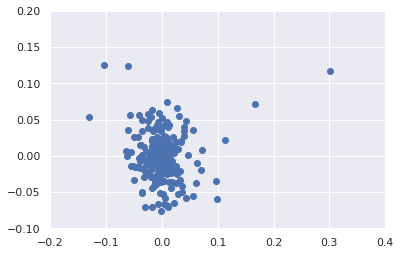

In [99]:
plt.scatter(pca_df["X"],pca_df["Y"])
plt.xlim(-0.2, 0.4)
plt.ylim(-0.1, 0.2)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65281 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65281 missing from current font.
  font.set_text(s, 0, flags=flags)


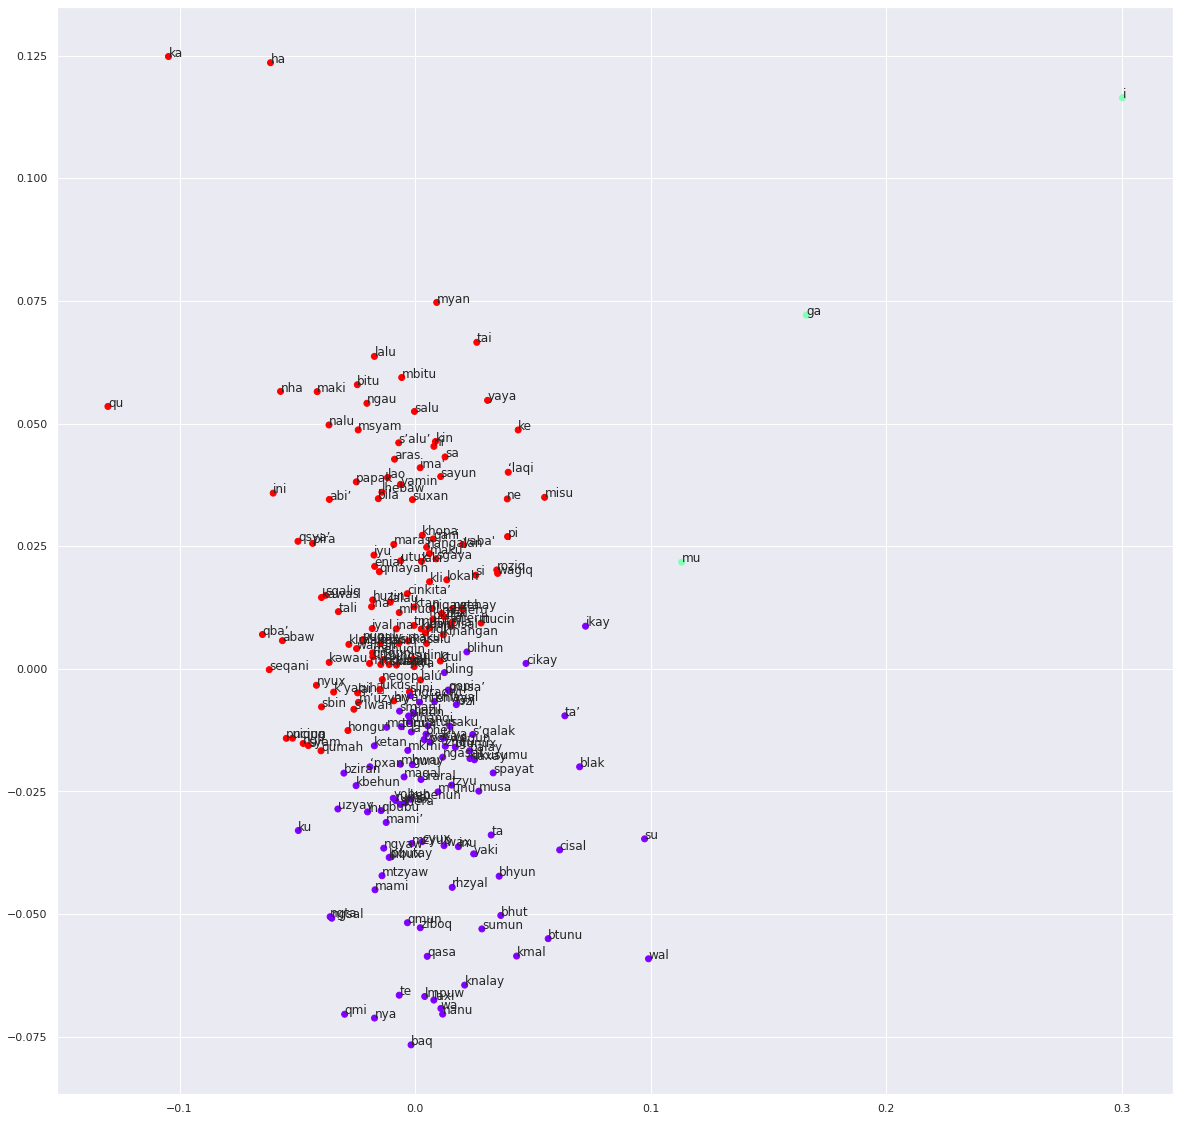

In [120]:
kmeans = KMeans(3)
kmeans.fit(pca_df)
identified_clusters = kmeans.fit_predict(pca_df)
identified_clusters
pca_df_with_clusters = pca_df.copy()
pca_df_with_clusters['Clusters'] = identified_clusters 
plt.scatter(pca_df_with_clusters['X'], pca_df_with_clusters['Y'], c = pca_df_with_clusters['Clusters'], cmap = 'rainbow')

for i, label in enumerate(matrix_row_name):
     plt.annotate(label, (pca_df_with_clusters['X'][i], pca_df_with_clusters['Y'][i]), fontsize = 12)
plt.rcParams['figure.figsize'] = [20, 20]

plt.show()

# Findings

The distributions of the K-means plot demonstrate that *i*, *ga*, and *mu* are considered one cluster, even when K is set to 2. The common ground of the three distinctive words is that they are all function words that contain few semantic information. For instance, *i* is the nominative case marker for third person singular (NOM.3sg). *ga* is a topic marker, and *mu* is 'mine', a genitive case of first person pronoun (GEN.1sg).

On the other hand, there are fewer differences between red and purple dots. In others words, the distinctions between the two groups of words are not obvious. For example, select six words near the borderline:

From red:
*   *qumah* 'hoe'
*   *hongu* 'bridge'
*   *lalú* 'name'

From purple:
*   *bziran* 'store'
*   *bling* 'hole'
*   *blihun* 'door frame'

Judging by the six words above, we can hardly see any shared characteristics within group and nor any different traits between groups. Thus, there is not a strong justification explaining why red and purple groups of words cluster this way. 